## Members:

| S.No      | Name | Roll No     |
| :---:        |    :----:   |          :---: |
| 1.      | Keshav S       | CB.EN.U4CSE20327   |
| 2.   | Raj Mota        | CB.EN.U4CSE20349      |
| 3.      | Sai Sidharth Sriram       | CB.EN.U4CSE20352   |
| 4.   | Sanjith Raghav S      | CB.EN.U4CSE20355      |
| 5.   | Tarun Rajkumar       | CB.EN.U4CSE20365      |

In [1]:
#Base Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting the Dataset into Test and Train
from sklearn.model_selection import train_test_split

#Encoding the Ordinal Data
from sklearn.preprocessing import LabelEncoder

#ML Models
#Decision Tree
from sklearn import tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#KNN
from sklearn.neighbors import KNeighborsClassifier 
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 

#Initializing the Classifiers
#Logisitc Regression
d_tree_classifier = tree.DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
gaussianNB_classifier = GaussianNB()  
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski') 

#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

#Plotting Decision Tree and Random Forest
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

### Attribute Information

### About the Data

-----------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Basic Analysis of the Data

In [3]:
print("Dimensions of the Dataset: ",df.shape)
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Dimensions of the Dataset:  (5110, 12)
Number of Rows:  5110
Number of Columns:  12


In [4]:
print("Dataset Info: \n")
df.info()

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print("5 Number Summary about the data: \n")
df.describe()

5 Number Summary about the data: 



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
print("Checking the number of NaN values column wise: \n")
df.isna().sum()

Checking the number of NaN values column wise: 



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Prepossessing

In [7]:
#Dealing with NaN values in the BMI Column
print("Mean: ", df['bmi'].mean())
print("Median: ", df['bmi'].median())
#Choosing the Mean to replace NaN values
mean = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(value=mean)
df.isna().sum()

Mean:  28.893236911794673
Median:  28.1


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#The ID Column is found to be no importance when passing the data to the ML Model and predicting data
#Hence we remove this column
df = df.drop(['id'], axis=1)

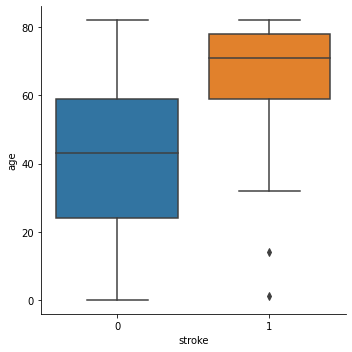

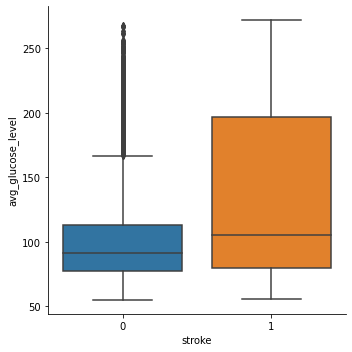

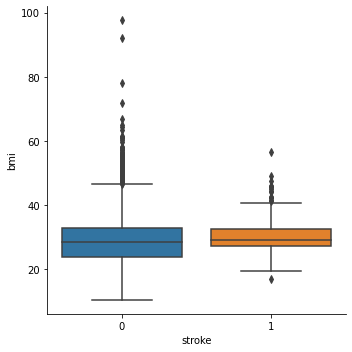

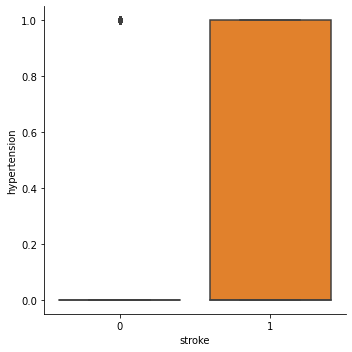

In [9]:
#Outlier Analysis using BoxPlot
#sns.catplot -> Used for Categorical Data
sns.catplot(data=df, x="stroke", y="age", kind="box")
sns.catplot(data=df, x="stroke", y="avg_glucose_level", kind="box")
sns.catplot(data=df, x="stroke", y="bmi", kind="box")
sns.catplot(data=df, x='stroke', y='hypertension', kind='box')

##### Removing the Outliers

In [10]:
#Deleting Outliers in Age Column
indexAge = df[((df['age'] < 20) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [11]:
#Deleting Outliers in Avg Glucose Level Column
indexAge = df[((df['avg_glucose_level'] > 220) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)

In [12]:
#Deleting Outliers in BMI Column
indexAge = df[((df['bmi'] > 50) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)

indexAge = df[((df['bmi'] > 40) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

indexAge = df[((df['bmi'] < 19) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [13]:
#Creating a Copy of the DataFrame for later use
df_copy = df.copy()

In [14]:
#Checking the Dataset info and 5 Number Summary after removing Outliers

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4839 non-null   object 
 1   age                4839 non-null   float64
 2   hypertension       4839 non-null   int64  
 3   heart_disease      4839 non-null   int64  
 4   ever_married       4839 non-null   object 
 5   work_type          4839 non-null   object 
 6   Residence_type     4839 non-null   object 
 7   avg_glucose_level  4839 non-null   float64
 8   bmi                4839 non-null   float64
 9   smoking_status     4839 non-null   object 
 10  stroke             4839 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 453.7+ KB


In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,42.465733,0.089688,0.051044,101.104991,28.261034,0.047117
std,22.693389,0.285764,0.220109,38.170183,6.779735,0.211911
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,24.000000,0.000000,0.000000,76.575000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,90.600000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,111.040000,32.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


### Visualization

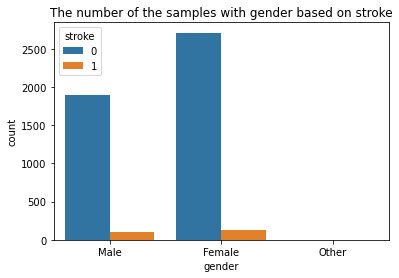

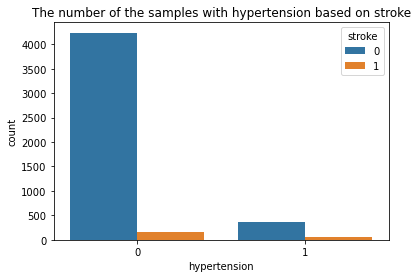

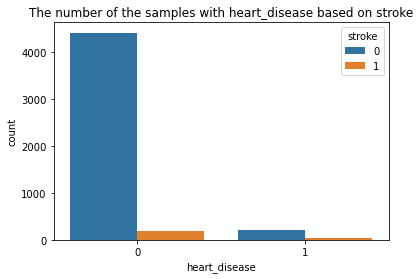

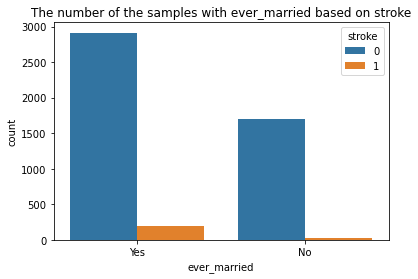

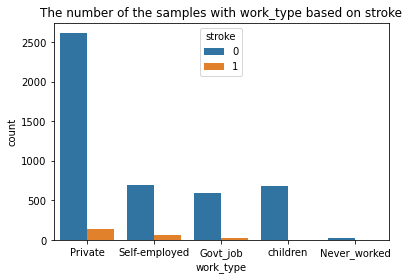

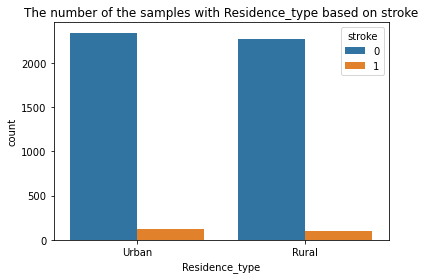

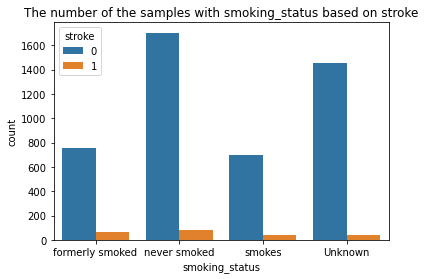

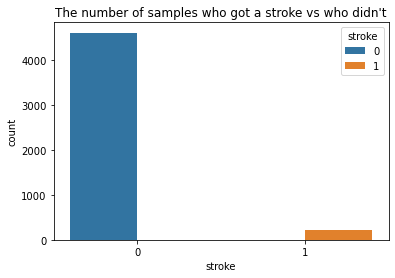

In [17]:
#Comparing the number of values in every column against the Stroke column
#This gives us an idea about the split of the Data
for i in df.columns[:]:
    #Only selects the column with Categorical Data or Numerical Data
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            #sns.countplot shows the Count of every column and since we compare it with stroke
            sns.countplot(data = df, x = i, hue = 'stroke')
            if(i == 'stroke'):
                plt.title("The number of samples who got a stroke vs who didn't".format(i))
            else:
                plt.title("The number of the samples with {} based on stroke".format(i))
            plt.show()

### Feature Processing - Encoding the Data

In [18]:
#Encoding the Categorical Data 
#Using Label Encoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [19]:
#Finding the Covarience and Correlation using Heat Map
df.corr().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.033985,0.013725,0.089066,-0.036229,0.060531,-0.005600,0.047895,-0.014588,-0.060305,0.013106
age,-0.033985,1.000000,0.274649,0.263344,0.682401,-0.374461,0.015810,0.180236,0.363786,0.272439,0.258181
hypertension,0.013725,0.274649,1.000000,0.098082,0.162533,-0.053856,-0.002491,0.143337,0.141204,0.120233,0.134999
heart_disease,0.089066,0.263344,0.098082,1.000000,0.111758,-0.032723,0.006352,0.152005,0.056988,0.052727,0.152272
ever_married,-0.036229,0.682401,0.162533,0.111758,1.000000,-0.360695,0.002404,0.113621,0.360203,0.264548,0.112478
work_type,0.060531,-0.374461,-0.053856,-0.032723,-0.360695,1.000000,-0.006936,-0.036077,-0.332371,-0.317859,-0.037176
Residence_type,-0.005600,0.015810,-0.002491,0.006352,0.002404,-0.006936,1.000000,-0.000174,0.007454,0.007793,0.011792
avg_glucose_level,0.047895,0.180236,0.143337,0.152005,0.113621,-0.036077,-0.000174,1.000000,0.125998,0.046982,0.167816
bmi,-0.014588,0.363786,0.141204,0.056988,0.360203,-0.332371,0.007454,0.125998,1.000000,0.249680,0.029295
smoking_status,-0.060305,0.272439,0.120233,0.052727,0.264548,-0.317859,0.007793,0.046982,0.249680,1.000000,0.032070


In [20]:
#Finding the Covarience and Correlation using Heat Map
df.cov().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,0.243055,-0.380220,0.001934,0.009665,-0.008555,0.032805,-0.001380,0.901299,-0.048760,-0.031981,0.001369
age,-0.380220,514.989886,1.781081,1.315412,7.416958,-9.341442,0.179387,156.122457,55.970344,6.650402,1.241590
hypertension,0.001934,1.781081,0.081661,0.006169,0.022245,-0.016918,-0.000356,1.563467,0.273569,0.036958,0.008175
heart_disease,0.009665,1.315412,0.006169,0.048448,0.011782,-0.007918,0.000699,1.277085,0.085042,0.012484,0.007103
ever_married,-0.008555,7.416958,0.022245,0.011782,0.229390,-0.189904,0.000576,2.077161,1.169627,0.136292,0.011416
work_type,0.032805,-9.341442,-0.016918,-0.007918,-0.189904,1.208413,-0.003812,-1.513799,-2.477101,-0.375856,-0.008660
Residence_type,-0.001380,0.179387,-0.000356,0.000699,0.000576,-0.003812,0.249978,-0.003320,0.025267,0.004191,0.001249
avg_glucose_level,0.901299,156.122457,1.563467,1.277085,2.077161,-1.513799,-0.003320,1456.962867,32.606165,1.929000,1.357411
bmi,-0.048760,55.970344,0.273569,0.085042,1.169627,-2.477101,0.025267,32.606165,45.964808,1.820861,0.042088
smoking_status,-0.031981,6.650402,0.036958,0.012484,0.136292,-0.375856,0.004191,1.929000,1.820861,1.157071,0.007310


### Modelling the Data

In [21]:
X = df.drop(['stroke'],axis=1)
Y = df['stroke'].to_frame()

In [22]:
#Is this Needed?
#Normalizing the Data
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3 , random_state=10)

## Implementing Various Classification Models

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN - Kth Nearest Neighbour
5. Naive Bayes

### 1. Decision Tree

In [24]:
d_tree_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

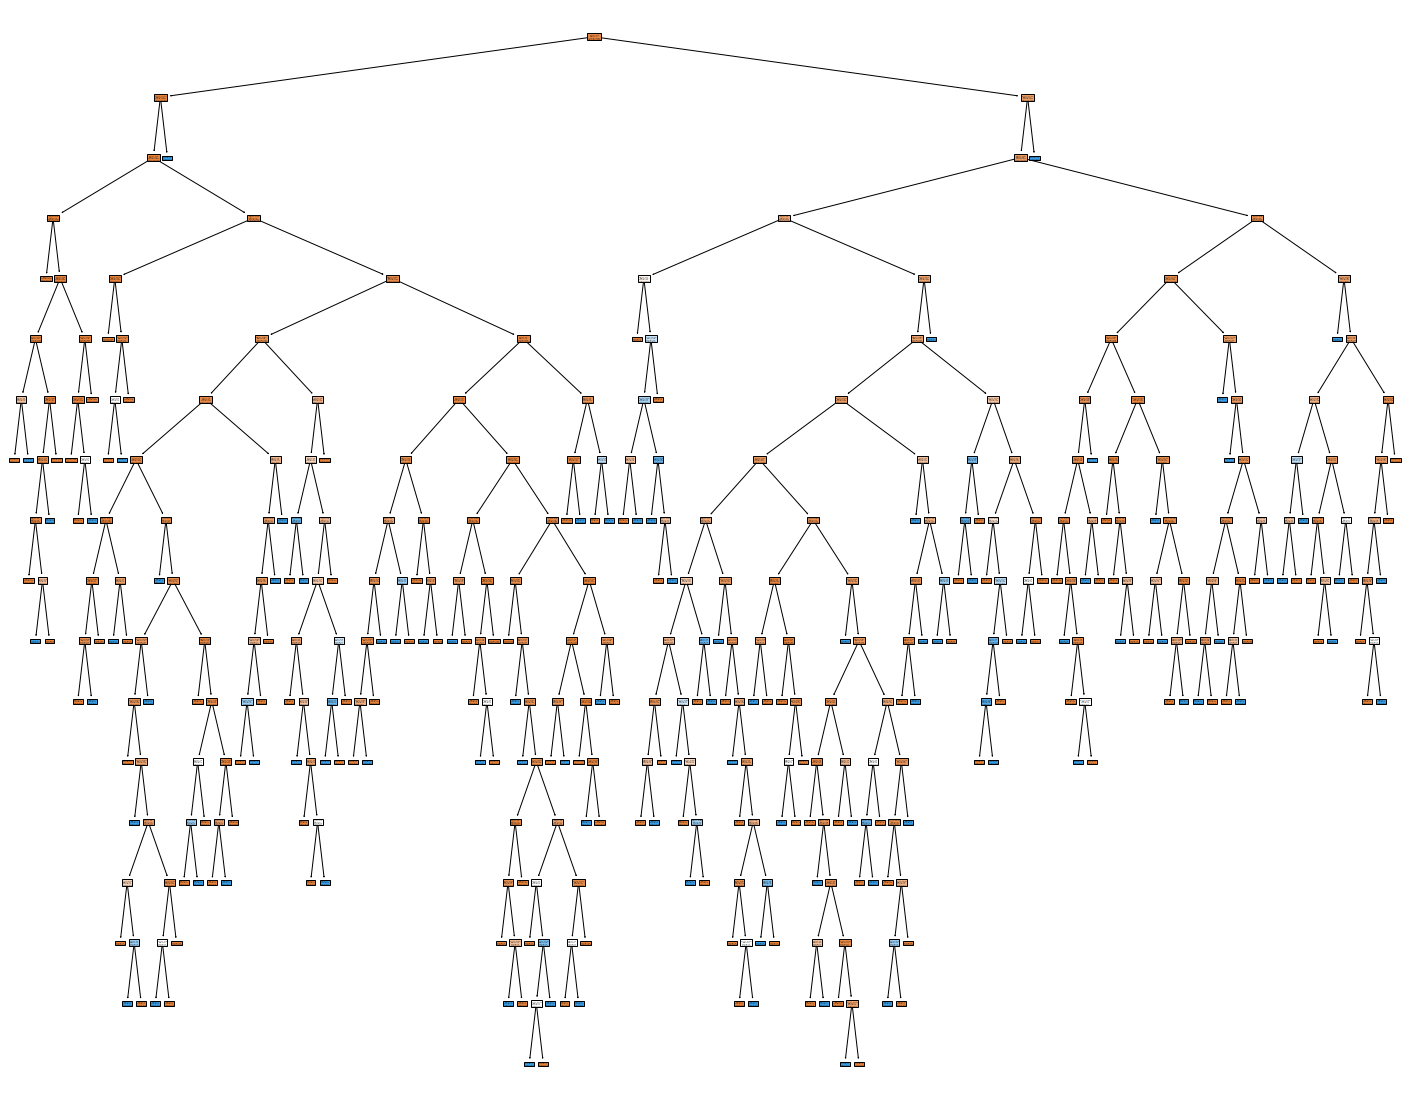

In [25]:
Y_pred_dt = d_tree_classifier.predict(X_test)
plt_1 = plt.figure(figsize=(25, 20))
plot_tree(d_tree_classifier,filled=True)
plt.show()
plt_1.savefig('Decision_Tree.png')

### Evaluation Metrics

#### Confusion Matrix

Confusion Matrix for Decision Tree: 
 [[1315   69]
 [  45   23]]


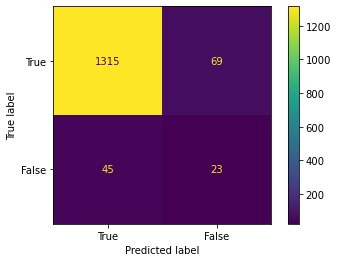

In [26]:
confu_mat_dTree = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix for Decision Tree: \n",confu_mat_dTree)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_dTree, display_labels=[True, False])
confu_mat_visualize.plot()

In [27]:
print('Accuracy Score :',accuracy_score(Y_pred_dt,Y_test))
print('Precision Score :',precision_score(Y_pred_dt, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_dt,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_dt, Y_test, average='weighted'))

Accuracy Score : 0.9214876033057852
Precision Score : 0.9113734014123491
Recall score : 0.9214876033057852
F1_Score : 0.915942522227309


### 2. Random Forest

In [28]:
rf_classifier.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

In [29]:
Y_pred_rf = rf_classifier.predict(X_test)

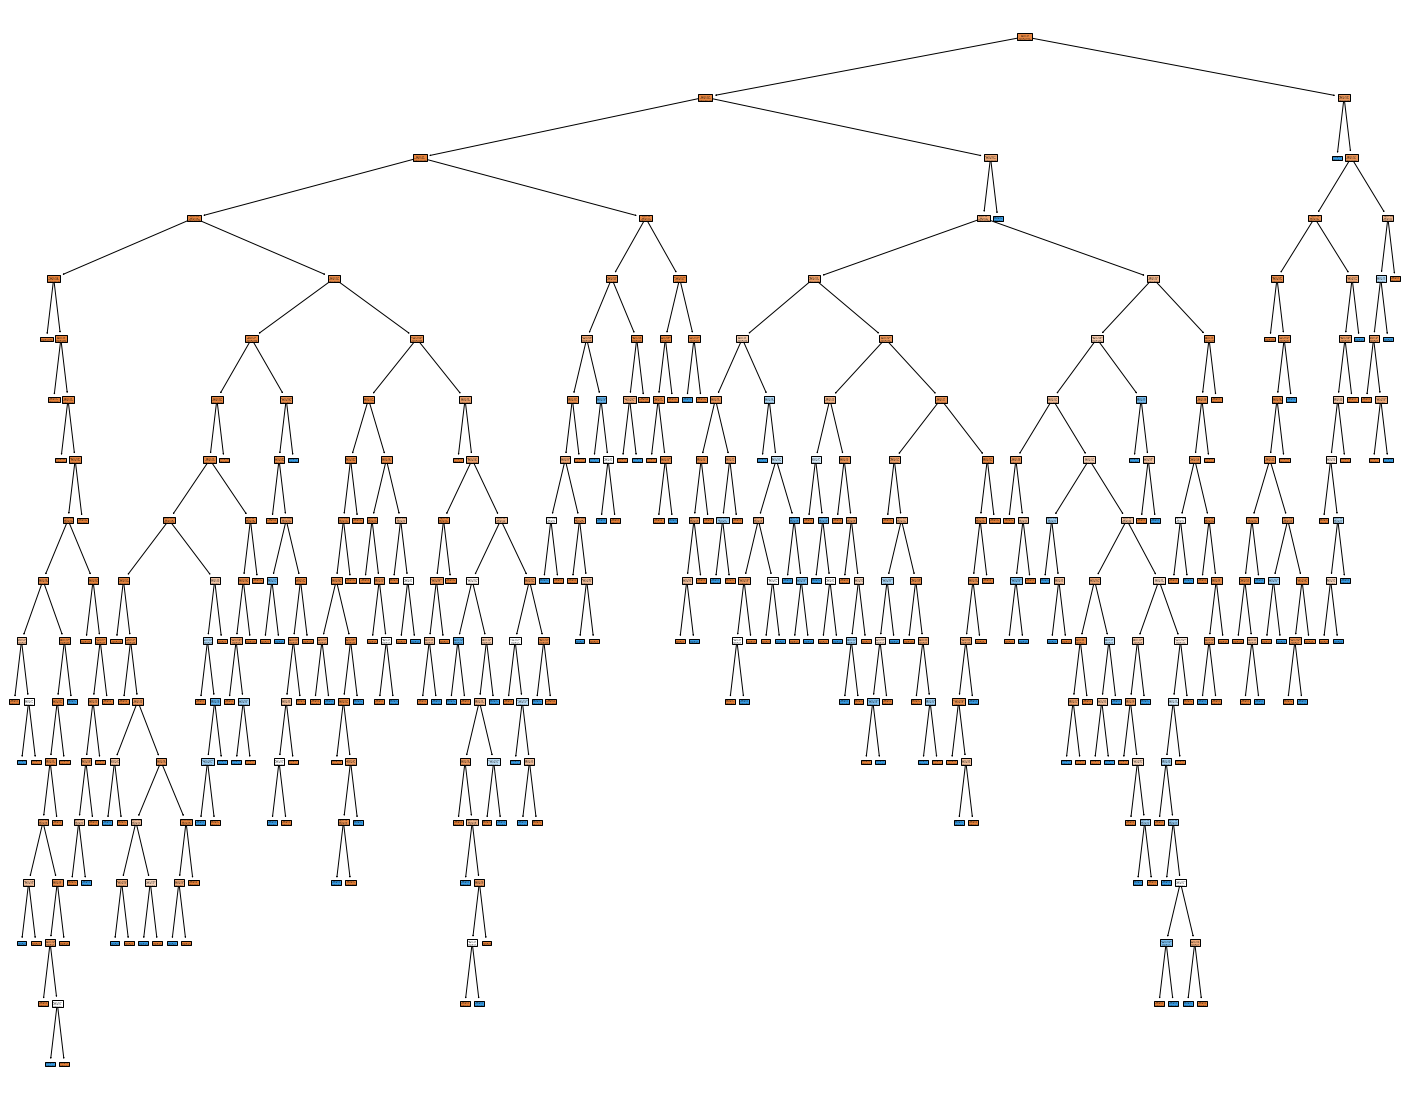

In [30]:
plt_1 = plt.figure(figsize=(25, 20))
tree.plot_tree(rf_classifier.estimators_[0],filled=True)
plt.show()

Confusion Matrix for Random Forest: 
 [[1382    2]
 [  60    8]]


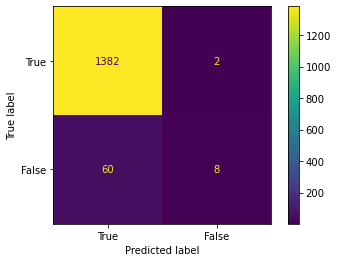

In [31]:
confu_mat_randomForest = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest: \n",confu_mat_randomForest)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_randomForest, display_labels=[True, False])
confu_mat_visualize.plot()

In [32]:
print('Accuracy Score :',accuracy_score(Y_pred_rf,Y_test))
print('Precision Score :',precision_score(Y_pred_rf, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_rf,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_rf, Y_test, average='weighted'))

Accuracy Score : 0.9573002754820936
Precision Score : 0.9924880547929296
Recall score : 0.9573002754820936
F1_Score : 0.9727376357370567


### 3. Naive Bayes

In [33]:
gaussianNB_classifier.fit(X_train, Y_train.values.ravel())
Y_pred_nb = gaussianNB_classifier.predict(X_test)

In [34]:
df_nb = pd.DataFrame({"Y_Pre":Y_pred_nb, "Y_Actual":Y_test.values.ravel()})
df_nb

,Y_Pre,Y_Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1447,0,0
1448,0,0
1449,0,0
1450,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for Naive Bayes: 
 [[1246  138]
 [  32   36]]


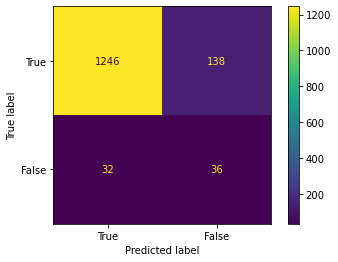

In [35]:
confu_mat_Naive = confusion_matrix(Y_test, Y_pred_nb)  
print("Confusion Matrix for Naive Bayes: \n",confu_mat_Naive)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_Naive, display_labels=[True, False])
confu_mat_visualize.plot()

In [36]:
print('Accuracy Score :',accuracy_score(Y_pred_nb,Y_test))
print('Precision Score :',precision_score(Y_pred_nb, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_nb,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_nb, Y_test, average='weighted'))

Accuracy Score : 0.8829201101928374
Precision Score : 0.8558450490500505
Recall score : 0.8829201101928374
F1_Score : 0.8596096888563249


### 4. KNN

In [37]:
#.values converts the data to a 1D array and .ravel flattens it
knn_classifier.fit(X_train, Y_train.values.ravel())  
Y_pred_knn = knn_classifier.predict(X_test) 

In [38]:
df_knn = pd.DataFrame({"Y_Pre":Y_pred_knn, "Y_Actual":Y_test.values.ravel()})
df_knn

,Y_Pre,Y_Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1447,0,0
1448,0,0
1449,0,0
1450,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for KNN: 
 [[1373   11]
 [  60    8]]


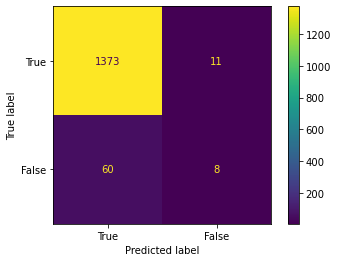

In [39]:
confu_mat_KNN = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN: \n",confu_mat_KNN)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_KNN, display_labels=[True, False])
confu_mat_visualize.plot()

In [40]:
print('Accuracy Score :',accuracy_score(Y_pred_knn,Y_test))
print('Precision Score :',precision_score(Y_pred_knn, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_knn,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_knn, Y_test, average='weighted'))

Accuracy Score : 0.9511019283746557
Precision Score : 0.9806100848833299
Recall score : 0.9511019283746557
F1_Score : 0.9644467988884946
